# KNN Exercise
Note: This exercise closely follows the post by Scott Fortmann-Roe about bias-variance tradeoff (see references below). It is recommended that you think about each of the questions before referring to that essay.

In this exercise you will get more familiar with a **non-parametric** learning algorithm, an implement k-Nearest Neighbours (kNN). You will then analyse the bias-variance tradeoff and try to come up with the optimal kNN classifier for the given data.

**Note: You MAY NOT use Sklearn for anything besides comparison or debugging, train-test splitting, and K-Fold cross validation.**

For this exercise we will use hypothetical and artificial generated data.


## Implement k-Nearest Neighbours (kNN)

For this task, assume each data point is an n-dimensional point in $\mathbb{R}^n$, and each label is either -1 or 1.

**Question 1:** Implement a class called KNNClassifier and three methods:
- `fit`: should receive the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]). 
- `predict`: should receive a set of data (an array of shape [n_samples, n_features]) and **return** their predicted labels (array of shape [n_samples]).
- `score`: should receive the training data (an array of shape [n_samples, n_features]) and their labels (array of shape [n_samples]), and **return** the score of the model (accuracy).


Use simple Euclidean distance to measure the distance between two points. In case two points in the training have the same distance from a given point to predict, the nearest would be the one appearing first in the training set. 

Use majority vote between all kNN of a point to predict its label. In case the vote of all kNN is tied, you may predict whichever label you wish.

You may look up [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for reference.

**Make sure you are using numpy vectorization for this exercise! This is a must. You may ONLY use one loop in the predict function, and only there**

**Hint**: `fit` does not need to implement any classification logic, only to save the training data and their labels in class attributes of the specific instance (*KNNClassifier.data*, *KNNClassifier.labels*). The classification logic should be implemented in `predict`.


In [1]:
import numpy as np

class KNNClassifier:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            predictions.append(predicted_label)
        return np.array(predictions)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy


## Learn and evaluate kNN algorithm on artificial data
kNN is a **non-parametric** in the sense that no inner parameter of the model is learned by the sample training set. However, the number of neighbours **k is considered a hyper-parameter**, and choosing the optimal value of k musst consider the balance between bias and variance as discussed in class.




### An applied example: voter party registration

In this example, each voter is described by a vector of two features $(x_0, x_1)$, where $x_0$ describes how wealthy that voter is, and $x_1$ describes how religious the voter is. Label $y=1$ represents a Republican voter, and $y=-1$ represents a Democrat voter.

Use the given function `generate_data(m)` to create m samples with m labels. The labels are created using the following function:

$$
y = \text{sign}\left(x_1 - 0.1\times((x_0-5)^3-x_0^2+(x_0 − 6)^2+80)\right)
$$

and then a small fraction of the labels (chosen randomly, up to 10%) are flipped to represent unknown effect of features which are not measured. The sign of 0 is defined as 1 for this case.


Below is an example of generating 500 samples, and plotting them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary_voting_pred(wealth, religiousness):
  return religiousness-0.1*((wealth-5)**3-wealth**2+(wealth-6)**2+80)

def generate_data(m, seed=None):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed) 
  
  X = np.random.uniform(low=0.0, high=10.0, size=(m,2))
  y = np.sign(true_boundary_voting_pred(X[:,0], X[:,1]))
  y[y==0] = 1
  samples_to_flip = np.random.randint(0,m//10)
  flip_ind = np.random.choice(m, samples_to_flip, replace=False)
  y[flip_ind] = -y[flip_ind]
  return X, y

def plot_labeled_data(X, y, no_titles=False):
  republicans = (y==1)
  democrats = (y==-1)
  plt.scatter(X[republicans,0], X[republicans,1], c='r')
  plt.scatter(X[democrats,0], X[democrats,1], c='b')
  if not no_titles:
    plt.xlabel('Wealth')
    plt.ylabel('Religiousness')
    plt.title('Red circles represent Republicans, Blues Democrats')
    
  plt.xlim([0, 10]);
  plt.ylim([0, 10]);
  plt.plot(np.linspace(0,10,1000), -true_boundary_voting_pred(np.linspace(0,10,1000), np.zeros(1000)), linewidth=2, c='k');

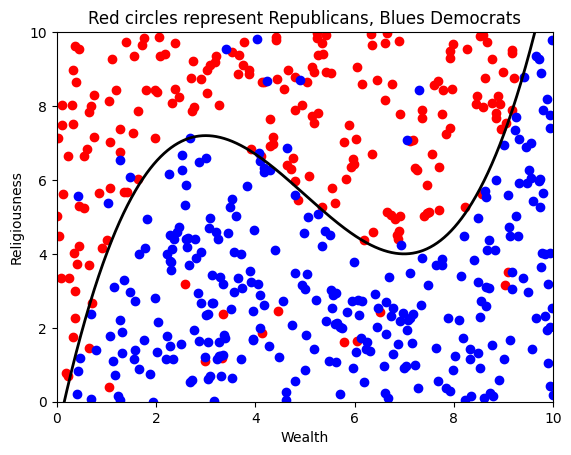

In [3]:
# Play this several times to see different sampling sets
X, y = generate_data(m=500)
plot_labeled_data(X, y)
plt.show()


### Analyse the properties of kNN
**Question 2:** Generate multiple sample data sets of size 500 (use the given function above), and plot the decision plane for increasing values of k (e.g.: 1, 3, 5, 11, 21, 51, 99).

The decision plane should cover the range [0,10] for both axes, coloring the patches that would be classified as Republicans or Democrats in two colors. It should look something like [that](https://drive.google.com/open?id=1jMD7I9sWT4w4O48pjwSPCFL1NLLPo10j). **Hint:** Use `np.meshgrid` for the plot ([documentation and example](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)), and take inspiration from the code [here]( https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py).





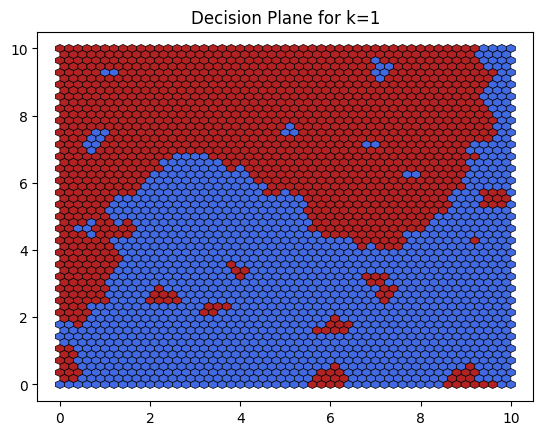

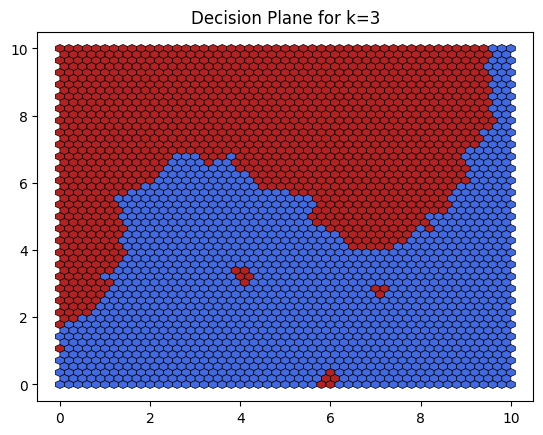

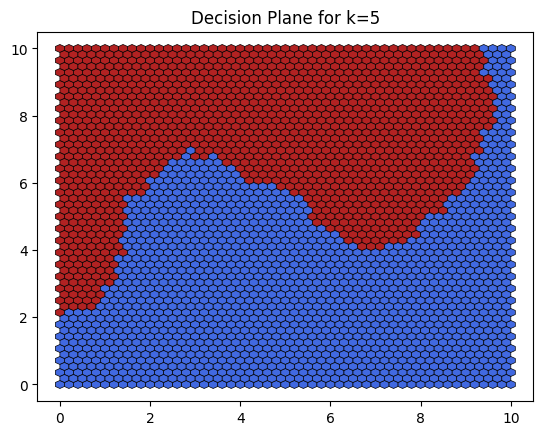

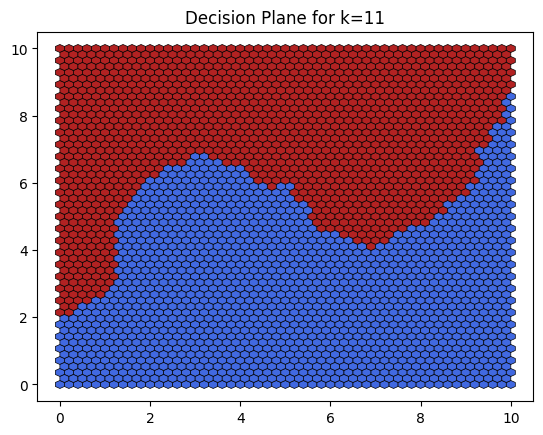

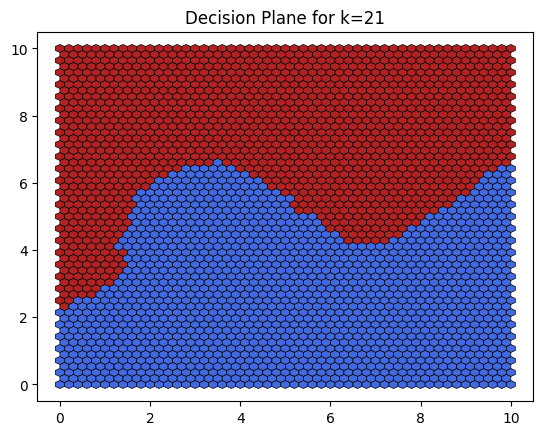

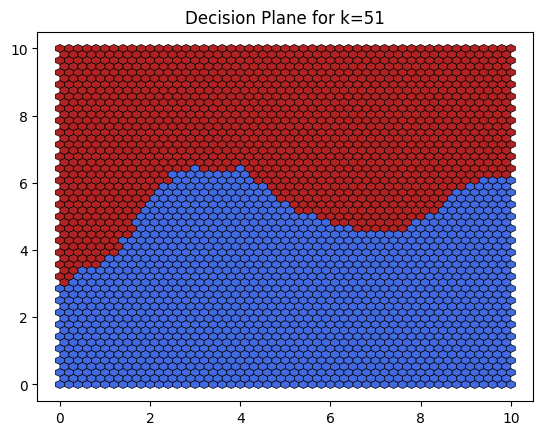

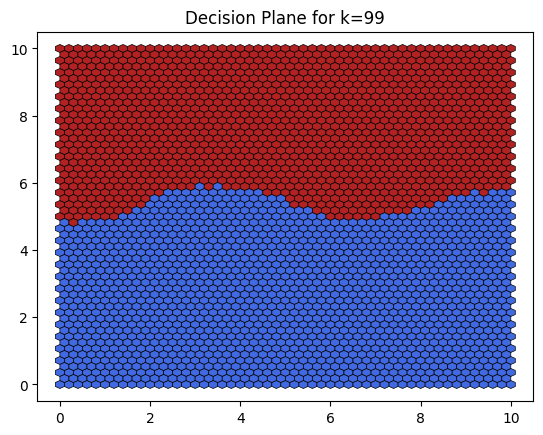

In [4]:
from matplotlib.colors import ListedColormap
X_train, y_train = generate_data(m=500)
k_values = [1, 3, 5, 11, 21, 51, 99]

# generating X_test
num_points = 70  # Increase number of points for smoother visualization
x1_values = np.linspace(0, 10, num_points)
x2_values = np.linspace(0, 10, num_points)
X1_test, X2_test = np.meshgrid(x1_values, x2_values)
X_test = np.column_stack((X1_test.ravel(), X2_test.ravel()))



for k in k_values:
    clf = KNNClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    colors = ['royalblue', 'firebrick'] 
    cmap = ListedColormap(colors)
    plt.hexbin(X_test[:, 0], X_test[:, 1], C=y_pred, cmap=cmap, gridsize=50,edgecolors='black', linewidths=0.5)
    plt.title(f'Decision Plane for k={k}')
    plt.show()


Answer the following questions:

**2.1** - How is the decision plain affected from changes in the sample set, as a function of k?

We observe that as kk increases, the number of distinct groups in the decision plane decreases. By the time k=11 is reached, two clearly distinct groups emerge, with one located above and one below.

**2.2** - Can you describe when do you underfit or overfit the data? 



A small k (up to k=5) may lead to overfitting by considering too few neighbors and capturing noise, while a large k (eg. k=99) can result in underfitting by oversimplifying the model and ignoring important patterns in the data. 

**2.3** - How does the complexity of this model depends on k? (ignoring time and space complexity, and refering to the algorithm complexity)

The complexity is constant regardless of the value of k. This is because the algorithm always computes the distances between all points in the training set and the test set. The role of k is only to determine the number of nearest neighbors to consider when making predictions, so it does not affect the algorithm complexity.

### Finding the optimal k
**Question 3:** 

**3.a.** Use the generate_data function to sample a single sample set of size 1000 and divide it randomly to train (0.6) / validation (0.2) / test (0.2) sets. 



In [5]:

from sklearn.model_selection import train_test_split

X, y = generate_data(m=1000)

train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=val_size+test_size, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=42)

print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 600
Validation set size: 200
Test set size: 200


**3.b.** Calculate the train and validation errors per k using the knn.score function. The error would be 1-accuracy for the given dataset.


In [6]:
train_errors = []
val_errors = []

for k in k_values:
    clf = KNNClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_acc = clf.score(X_train, y_train)
    val_acc = clf.score(X_val, y_val)
    
    train_err = 1 - train_acc
    val_err = 1 - val_acc
    
    train_errors.append(train_err)
    val_errors.append(val_err)

    print(f"k={k}, Train Error: {train_err:.4f}, Validation Error: {val_err:.4f}")


k=1, Train Error: 0.0000, Validation Error: 0.1950
k=3, Train Error: 0.0817, Validation Error: 0.1700
k=5, Train Error: 0.1050, Validation Error: 0.1550
k=11, Train Error: 0.0983, Validation Error: 0.1450
k=21, Train Error: 0.1283, Validation Error: 0.1500
k=51, Train Error: 0.1267, Validation Error: 0.1450
k=99, Train Error: 0.1483, Validation Error: 0.1800


**3.c.** Plot the train vs validation error for several k values, and choose the best k. Why did you choose this k?



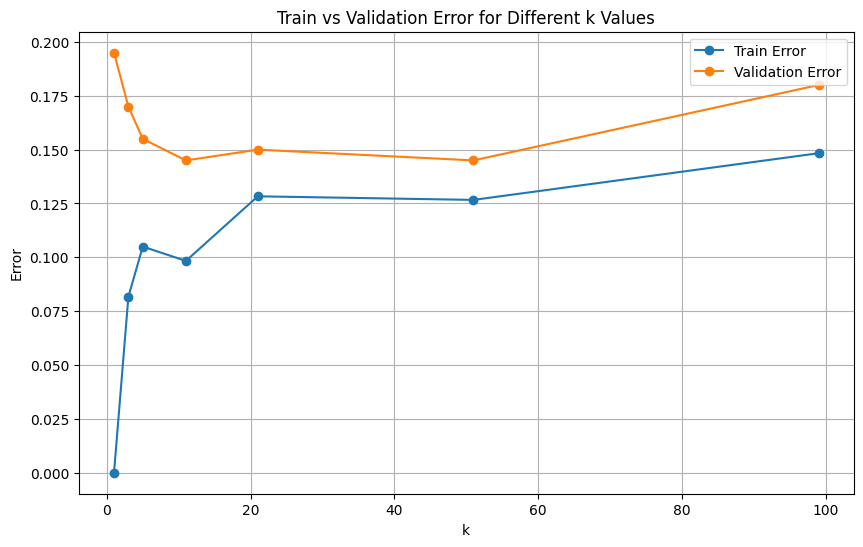

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, val_errors, label='Validation Error', marker='o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Train vs Validation Error for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

I would chose k = 11 because as we can see the error for validation is the smallest and the error for train set is not that big yet.

**3.d.** Where do you underfit/overfit the data?


we can see overfitting for small values of k like 1, 3, 5 and overfitting for big values of k like 51 and 99.

**3.e.** Finally, estimate the generalization error of your chosen classifier using the test set.


In [8]:
k = 11
clf = KNNClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
test_acc = clf.score(X_test, y_test)
generalization_error = 1 - test_acc
print("Generalization Error on Test Set:", generalization_error)


Generalization Error on Test Set: 0.08499999999999996


### Using cross validation
**Question 4:** This time, put the test data aside (0.2 of the data), and apply 5-fold CV on the remaining data to evaluate the performance of each k value. 
What is the size of the validation and train set now, in each CV iteration?
Did your final model selection change? Explain why.

In [10]:
from sklearn.model_selection import cross_val_score
X, y = generate_data(m=1000)

k_values = [1, 3, 5, 11, 21]

X_sets = []
y_sets = []
for i in range(5):
    X_set, _, y_set, _ = train_test_split(X, y, test_size=0.2, random_state=i)
    X_sets.append(X_set)
    y_sets.append(y_set)

# Perform cross-validation for each value of k
for k in k_values:
    cv_scores = []
    for i in range(5):
        X_train, X_val, y_train, y_val = train_test_split(X_sets[i], y_sets[i], test_size=0.25, random_state=i)
        clf = KNNClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        score = clf.score(X_val, y_val)
        cv_scores.append(score)
    mean_cv_score = np.mean(cv_scores)
    print(f"Mean cross-validation score for k={k}: {mean_cv_score}")


Mean cross-validation score for k=1: 0.893
Mean cross-validation score for k=3: 0.9179999999999999
Mean cross-validation score for k=5: 0.913
Mean cross-validation score for k=11: 0.908
Mean cross-validation score for k=21: 0.9099999999999999


We obtain relatively close values for every k, so after looking at 

## References
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://scott.fortmann-roe.com/docs/MeasuringError.html
- http://scikit-learn.org/stable/modules/cross_validation.html
